<a href="https://colab.research.google.com/github/plaban1981/Feature-Engineering-for-Machine-Learning/blob/master/Numerical_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### What is a Variable?
A variable is any characteristic, number, or quantity that can be measured or counted. The following are examples of variables:

- Age (21, 35, 62, ...)
- Gender (male, female)
- Income (GBP 20000, GBP 35000, GBP 45000, ...)
- House price (GBP 350000, GBP 570000, ...)
- Country of birth (China, Russia, Costa Rica, ...)
- Eye colour (brown, green, blue, ...)
- Vehicle make (Ford, Volkswagen, ...)


They are called 'variables' because the value they take may vary (and it usually does) in a population.

#### Most variables in a data set can be classified into one of two major types:

- Numerical variables
- Categorical variables

##Numerical variables
The values of a numerical variable are numbers. They can be further classified into 

- discrete variables and 
- continuous variables.

#### Discrete numerical variable
A variable which values are whole numbers (counts) is called discrete. 

For example, the number of items bought by a customer in a supermarket is discrete. The customer can buy 1, 25, or 50 items, but not 3.7 items. It is always a round number. 

The following are examples of discrete variables:

- Number of active bank accounts of a borrower (1, 4, 7, ...)
- Number of pets in the family
- Number of children in the family

#### Continuous numerical variable
A variable that may contain any value within some range is called continuous. 

For example, the total amount paid by a customer in a supermarket is continuous. 

The customer can pay, GBP 20.5, GBP 13.10, GBP 83.20 and so on. Other examples of continuous variables are:

- House price (in principle, it can take any value) (GBP 350000, 57000, 1000000, ...)
- Time spent surfing a website (3.4 seconds, 5.10 seconds, ...)
- Total debt as percentage of total income in the last month (0.2, 0.001, 0, 0.75, ...)

## Real Life example: Peer to peer lending (Finance)
#### Lending Club

Lending Club is a peer-to-peer Lending company based in the US. They match people looking to invest money with people looking to borrow money. When investors invest their money through Lending Club, this money is passed onto borrowers, and when borrowers pay their loans back, the capital plus the interest passes on back to the investors. It is a win for everybody as they can get typically lower loan rates and higher investor returns.

If you want to learn more about Lending Club follow this link.

The Lending Club dataset contains complete loan data for all loans issued through 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Features include credit scores, number of finance inquiries, address including zip codes and state, and collections among others. Collections indicates whether the customer has missed one or more payments and the team is trying to recover their money.

The file is a matrix of about 890 thousand observations and 75 variables. More detail on this dataset can be found in Kaggle's website

Let's go ahead and have a look at the variables!

====================================================================================================

#### To download the Lending Club loan book from Kaggle go to this website

Scroll down to the bottom of the page, and click on the link 'loan.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Unzip it, and save it to a directory of your choice.

Note that you need to be logged in to Kaggle in order to download the datasets.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## let's load the dataset with just a few columns and a few rows to speed things up

In [60]:
#use_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status','open_il_12m']
data = pd.read_csv('/content/drive/My Drive/loan.csv')  # set a seed for reproducibility
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,...,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,...,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,...,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,...,0.0,0.0,385183.0,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,...,0.0,0.0,157548.0,29674.0,9300.0,32332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310173 entries, 0 to 1310172
Columns: 145 entries, id to settlement_term
dtypes: float64(107), int64(2), object(36)
memory usage: 1.4+ GB


In [25]:
data.shape

(1310173, 145)

In [26]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,...,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,1.310173e+06,1.310173e+06,1.310173e+06,1.310173e+06,1.310173e+06,1.310173e+06,0.0,1.308975e+06,1.310172e+06,1.310171e+06,644285.000000,213310.000000,1.310172e+06,1.310172e+06,1.310172e+06,1.309167e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,351419.000000,1310172.0,7.828500e+04,78281.000000,1.310172e+06,1.310172e+06,1.310172e+06,950959.000000,950960.000000,950960.000000,...,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310171e+06,1.310172e+06,1.310172e+06,1.258141e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310170e+06,1.295109e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,1.310172e+06,6.898500e+04,68985.000000,68985.000000,68985.000000,67788.000000,68985.000000,68985.000000,68985.000000,68985.000000,22377.000000,7116.0,7116.000000,7116.0,7116.000000,5614.000000,7116.000000,7116.000000,21739.000000,21739.000000,21739.000000
mean,NaN,NaN,1.536886e+04,1.536884e+04,1.536363e+04,1.278063e+01,4.518380e+02,7.903220e+04,NaN,1.925419e+01,3.071940e-01,5.188262e-01,34.849504,71.708598,1.175597e+01,2.035908e-01,1.690450e+04,4.896432e+01,2.407538e+01,5.605610e+03,5.604384e+03,1.080711e+04,1.080282e+04,8.536689e+03,2.142070e+03,1.473783e+00,1.268757e+02,2.242903e+01,3.115441e+03,1.990426e-02,44.771313,1.0,1.263487e+05,19.232127,4.016267e-03,2.459284e+02,1.426844e+05,0.950893,2.763654,0.699295,...,5.624758e+00,4.809707e+00,7.566266e+00,8.465263e+00,8.293813e+00,1.386421e+01,5.571556e+00,1.171482e+01,5.539920e-04,2.676748e-03,8.159234e-02,2.137948e+00,9.406652e+01,4.042975e+01,1.326688e-01,4.717625e-02,1.796120e+05,5.225202e+04,2.388527e+04,4.491566e+04,3.475705e+04,0.607538,1.538189,11.486497,57.108528,2.998043,12.517707,0.041748,0.070943,37.326183,3.0,143.857598,3.0,13.809444,421.293981,10941.603096,184.506336,5034.702076,47.633525,13.954644
std,NaN,NaN,9.346530e+03,9.346532e+03,9.344858e+03,4.852437e+00,2.701846e+02,8.114760e+04,NaN,1.473392e+01,8.729961e-01,8.161617e-01,21.946060,25.519617,5.802250e+00,5.799315e-01,2.364499e+04,2.473765e+01,1.212795e+01,8.427518e+03,8.426595e+03,9.734906e+03,9.731252e+03,8.312221e+03,2.460390e+03,1.197868e+01,7.084684e+02,1.263756e+02,5.854942e+03,1.582795e-01,21.607559,0.0,8.120669e+04,7.977080,6.896206e-02,7.398293e+03,1.618603e+05,1.155414,2.990333,0.952661,...,3.458782e+00,3.125124e+00,4.673306e+00,7.440939e+00,4.802693e+00,8.118676e+00,3.361105e+00,5.785945e+00,2.506789e-02,5.503014e-02,4.935601e-01,1.899816e+00,9.115488e+00,3.624776e+01,3.722440e-01,3.812517e-01,1.833584e+05,5.107517e+04,2.363992e+04,4.601480e+04,2.959911e+04,0.969398,1.766506,6.6

##Continuous Variables

In [27]:
# let's look at the values of the variable loan_amnt
# this is the amount of money requested by the borrower
# in US dollars

data['loan_amnt'].unique()

array([ 2500, 30000,  5000, ..., 36100,  2025, 35125])

Text(0, 0.5, 'Number of Loans')

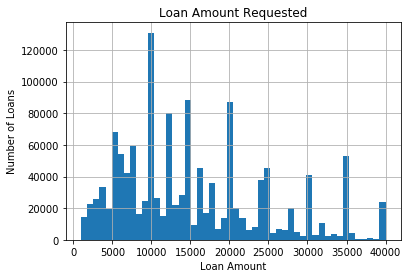

In [28]:
# let's make an histogram to get familiar with the
# distribution of the variable
data['loan_amnt'].hist(bins=50)
plt.title('Loan Amount Requested')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans')


The values of the variable vary across the entire range of the variable. This is characteristic of continuous variables.

The taller bars correspond to loan sizes of 10000, 15000, 20000, and 35000. There are more loans disbursed for those loan amount values. This indicates that most people tend to ask for these loan amounts. Likely, these particular loan amounts are pre-determined and offered as such in the Lending Club website.

Less frequent loan values, like 23,000 or 33,000 could be requested by people who require a specific amount of money for a definite purpose.

Text(0, 0.5, 'Number of Loans')

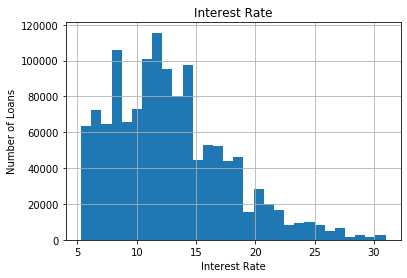

In [29]:
data['int_rate'].hist(bins=30)
plt.title('Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Number of Loans')

#### Again, we see that the values of the variable vary continuously across the variable range.



Text(0, 0.5, 'Number of Customers')

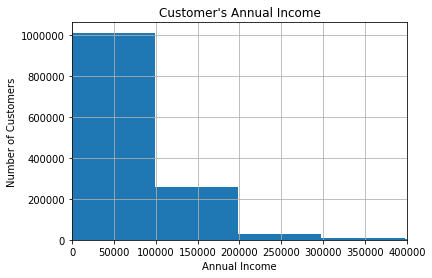

In [30]:
# and now,let's explore the income declared by the customers,
# that is, how much they earn yearly.

fig = data.annual_inc.hist(bins=100)
fig.set_xlim(0, 400000)
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')


The majority of salaries are concentrated towards values in the range 30-70 k, with only a few customers earning higher salaries. Again, the values of the variable, vary continuosly across the variable range.

## Discrete Variables

In [31]:
data.isnull().sum()[data.isnull().sum() > 0]

id                       1310173
member_id                1310173
emp_title                 104711
emp_length                 91709
url                      1310173
                          ...   
settlement_status        1288434
settlement_date          1288434
settlement_amount        1288434
settlement_percentage    1288434
settlement_term          1288434
Length: 130, dtype: int64

In [32]:
data.open_acc.dropna().unique()

array([  9.,  13.,   8.,  10.,  12.,  18.,   1.,  19.,  38.,   6.,  20.,
        27.,   7.,   4.,  14.,  17.,   5.,  11.,   3.,  16.,  15.,  24.,
        23.,  26.,  22.,  21.,  25.,  29.,   2.,  44.,  28.,  31.,  34.,
        32.,  30.,  35.,  41.,  36.,  40.,  33.,  45.,  43.,  37.,  59.,
        39.,   0.,  55.,  48.,  60.,  47.,  42.,  51.,  66.,  49.,  53.,
        57.,  50.,  46.,  54.,  61.,  63.,  68.,  52.,  64.,  62.,  69.,
        94.,  70.,  58.,  78.,  56.,  82., 101.,  86.,  65.,  72.,  80.,
        77.,  81.,  71.,  74.,  97.,  67.])

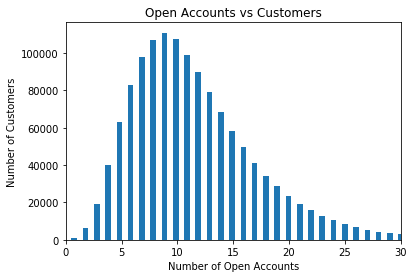

In [33]:
# let's make an histogram to get familiar with the
# distribution of the variable
data.open_acc.plot.hist(bins=200)
plt.xlabel('Number of Open Accounts')
plt.ylabel('Number of Customers')
plt.title('Open Accounts vs Customers')
plt.xlim(0, 30)
plt.show()

#### Histograms of discrete variables have this typical broken shape, as not all the values within the variable range are present in the variable.

**Number of installment accounts opened in past 12 months (open_il_12m in the dataset)**. 

Installment accounts are those that at the moment of acquiring them, there is a set period and amount of repayments agreed between the lender and borrower. An example of this is a car loan, or a student loan. The borrower knows that they are going to pay a certain, fixed amount over for example 36 months.

In [34]:
data.open_il_12m.unique()

array([ 1.,  2.,  0.,  3.,  5.,  4.,  6.,  8.,  7., 10.,  9., 11., 12.,
       13., 20., 21., 25., 15., 14., nan])

[]

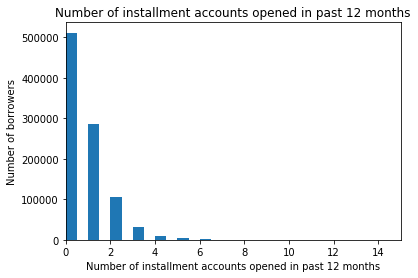

In [35]:
data.open_il_12m.plot.hist(bins=50)
plt.title('Number of installment accounts opened in past 12 months')
plt.xlabel('Number of installment accounts opened in past 12 months')
plt.ylabel('Number of borrowers')
plt.xlim(0,15)
plt.plot()

####The majority of the borrowers have none or 1 installment account, with only a few borrowers having more than 2.

##A variation of discrete variables: the binary variable

#### Binary variables, are discrete variables, that can take only 2 values, therefore binary.

In the next cells I will create an additional variable, called defaulted, to capture the number of loans that have defaulted. A defaulted loan is a loan that a customer has failed to re-pay and the money is lost.

The variable takes the values 0 where the loans are ok and being re-paid regularly, or 1, when the borrower has confirmed that will not be able to re-pay the borrowed amount.

In [36]:
data.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default'], dtype=object)

In [0]:
# let's create one additional variable called defaulted.
# This variable indicates if the loan has defaulted, which means,
# if the borrower failed to re-pay the loan, and the money
# is deemed lost.

data['Defaulted'] = np.where(data['loan_status'].isin(['Default']),1,0)

In [38]:
data['Defaulted'].mean()

1.602841762118438e-05

In [39]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Defaulted
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341.0,10.3,34.0,w,2386.02,2386.02,167.02,167.02,...,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315.0,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,...,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599.0,19.1,13.0,w,4787.21,4787.21,353.89,353.89,...,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468.0,78.1,13.0,w,3831.93,3831.93,286.71,286.71,...,0.0,385183.0,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829.0,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,...,0.0,157548.0,29674.0,9300.0,32332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0


In [40]:
# the new variable takes the value 1 for loans that
# are defaulted

data[data['loan_status'] == 'Default'].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Defaulted
220496,NaN,NaN,7500,7500,7500.0,36 months,12.73,251.74,B,B5,NaN,NaN,MORTGAGE,50000.0,Verified,Jul-2018,Default,n,NaN,NaN,medical,Medical expenses,460xx,IN,13.73,0.0,Oct-2003,1.0,64.0,83.0,4.0,1.0,52075.0,98.8,18.0,w,7154.49,7154.49,492.87,492.87,...,0.0,115993.0,53619.0,0.0,3743.0,2470.0,Nov-1998,2.0,1.0,1.0,NaN,1.0,5.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
220980,NaN,NaN,30000,30000,30000.0,36 months,20.89,1128.56,D,D4,President,8 years,MORTGAGE,109000.0,Verified,Jul-2018,Default,n,NaN,NaN,debt_consolidation,Debt consolidation,770xx,TX,27.71,1.0,Mar-2008,1.0,17.0,NaN,12.0,0.0,40662.0,83.5,25.0,w,26770.71,26770.71,6758.16,6758.16,...,0.0,378242.0,98662.0,34700.0,59542.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
260870,NaN,NaN,1000,1000,1000.0,36 months,17.47,35.89,D,D1,NaN,NaN,MORTGAGE,56160.0,Verified,Jun-2018,Default,n,NaN,NaN,other,Other,951xx,CA,6.80,5.0,Jun-2003,0.0,8.0,NaN,4.0,0.0,2874.0,47.9,10.0,w,1000.00,1000.00,0.00,0.00,...,0.0,143711.0,9713.0,6000.0,11061.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
338482,NaN,NaN,35000,35000,35000.0,60 months,10.90,759.25,B,B4,NaN,NaN,OWN,30000.0,Verified,May-2018,Default,n,NaN,NaN,debt_consolidation,Debt consolidation,141xx,NY,3.44,0.0,Feb-2004,0.0,NaN,NaN,3.0,0.0,12763.0,2.0,14.0,w,32251.22,32251.22,5500.13,5500.13,...,0.0,99000.0,12763.0,14000.0,0.0,18304.0,Oct-2005,2.0,1.0,4.0,87.8,1.0,10.0,0.0,0.0,39.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
347594,NaN,NaN,22000,22000,22000.0,60 months,24.84,643.67,E,E3,Teacher,4 years,RENT,62000.0,Verified,Apr-2018,Default,n,NaN,NaN,other,Other,088xx,NJ,16.12,0.0,Sep-2007,0.0,NaN,NaN,16.0,0.0,6591.0,90.3,31.0,w,21022.29,21022.29,3878.64,3878.64,...,0.0,68633.0,74439.0,4600.0,61333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


In [41]:
# A binary variable, can take 2 values. For example,
# the variable defaulted that we just created:
# either the loan is defaulted (1) or not (0)

data.Defaulted.unique()

array([0, 1])

(0, 2)

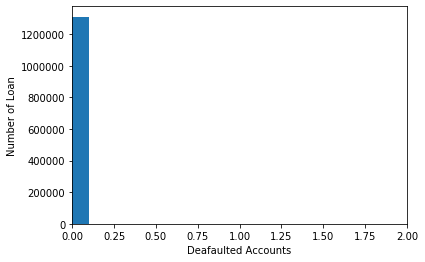

In [42]:
data.Defaulted.plot.hist()
plt.xlabel('Deafaulted Accounts')
plt.ylabel('Number of Loan')
plt.xlim(0,2)

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### As we can see, the variable shows only 2 values, 0 and 1, and the majority of the loans are ok.

##Categorical variables
The values of a categorical variable are selected from a group of categories, also called labels. 

Examples are gender (male or female) and marital status (never married, married, divorced or widowed). Other examples of categorical variables include:

- Intended use of loan (debt-consolidation, car purchase, wedding expenses, ...)
- Mobile network provider (Vodafone, Orange, ...)
Postcode

Categorical variables can be further categorised into 
- ordinal and 
- nominal variables.

##Ordinal categorical variables

####Categorical variable in which categories can be meaningfully ordered are called ordinal. For example:

- Student's grade in an exam (A, B, C or Fail).
- Days of the week can be ordinal with Monday = 1 and Sunday = 7.
- Educational level, with the categories Elementary school, High school, College graduate and PhD ranked from 1 to 4.

#### Nominal categorical variable
There isn't an intrinsic order of the labels. 

For example, country of birth (Argentina, England, Germany) is nominal. Other examples of nominal variables include:

Postcode
Vehicle make (Citroen, Peugeot, ...)
There is nothing that indicates an intrinsic order of the labels, and in principle, they are all equal.

#### To be considered:



Sometimes categorical variables are coded as numbers when the data are recorded (e.g. gender may be coded as 0 for males and 1 for females). The variable is still categorical, despite the use of numbers.

In a similar way, individuals in a survey may be coded with a number that uniquely identifies them (for example to avoid storing personal information for confidentiality). This number is really a label, and the variable then categorical. The number has no meaning other than making it possible to uniquely identify the observation (in this case the interviewed subject).

Ideally, when we work with a dataset in a business scenario, the data will come with a dictionary that indicates if the numbers in the variables are to be considered as categories or if they are numerical. And if the numbers are categoriies, the dictionary would explain what they intend to represent.

In [0]:
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']

In [45]:
categorical_columns

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date']

In [46]:
use_cols = ['id', 'purpose', 'loan_status', 'home_ownership']
data[use_cols].head()

,id,purpose,loan_status,home_ownership
0,NaN,debt_consolidation,Current,RENT
1,NaN,debt_consolidation,Current,MORTGAGE
2,NaN,debt_consolidation,Current,MORTGAGE
3,NaN,debt_consolidation,Current,MORTGAGE
4,NaN,debt_consolidation,Current,MORTGAGE


In [47]:
# let's inspect the variable home ownership,
# which indicates whether the borrowers own their home
# or if they are renting for example, among other things.
data.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

## For categorical data we use bar plots

Text(0.5, 1.0, 'Home Ownership')

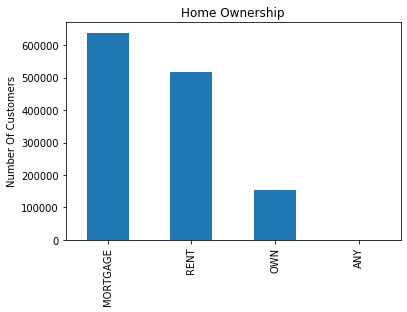

In [48]:
data['home_ownership'].value_counts().plot.bar()
plt.ylabel('Number Of Customers')
plt.title('Home Ownership')

#### The majority of the borrowers either own their house on a mortgage or rent their property. A few borrowers own their home completely. The category 'Other' seems to be empty. To be completely sure, we could print the numbers as below.

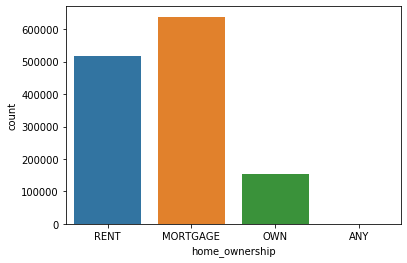

In [49]:
import seaborn as sns
sns.countplot(data['home_ownership'])

In [50]:
data['home_ownership'].value_counts()

MORTGAGE    638518
RENT        516343
OWN         154712
ANY            600
Name: home_ownership, dtype: int64

## There are 2 borrowers that have other arrangements for their property. For example, they could live with their parents, or live in a hotel.

In [51]:
# the "purpose" variable is another categorical variable
# that indicates how the borrowers intend to use the
# money they are borrowing, for example to improve their
# house, or to cancel previous debt.
data.purpose.unique()

array(['debt_consolidation', 'credit_card', 'house', 'car', 'other',
       'vacation', 'home_improvement', 'small_business', 'major_purchase',
       'medical', 'renewable_energy', 'moving', 'wedding', 'educational'],
      dtype=object)

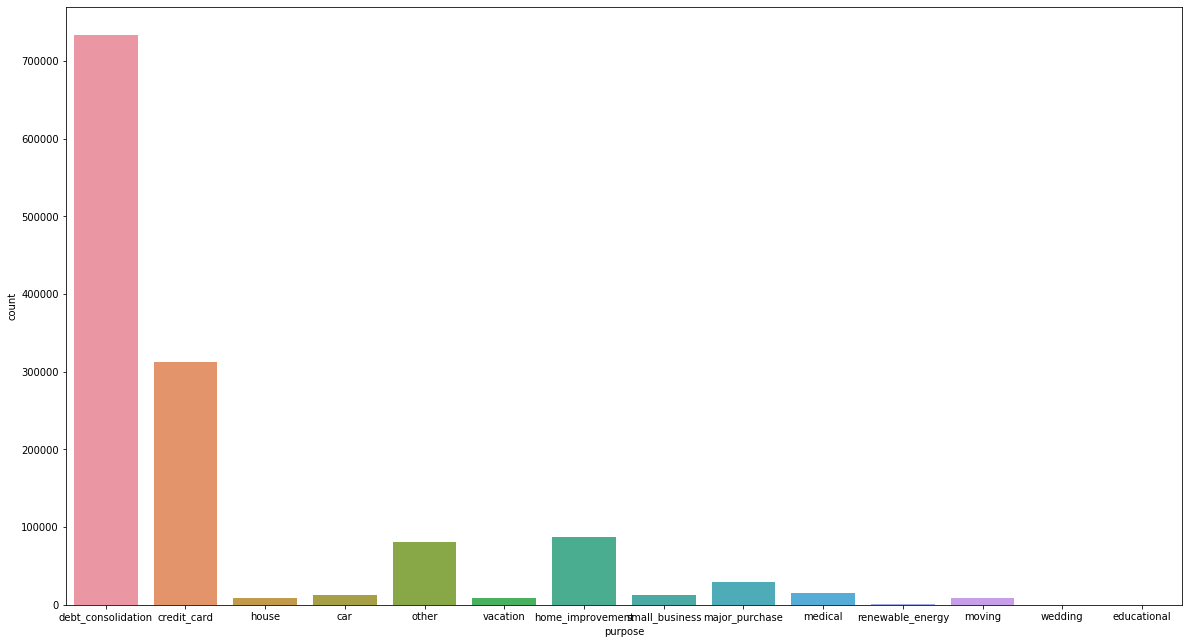

In [52]:
plt.figure(figsize=(20,11))
sns.countplot(data.purpose)

Text(0, 0.5, 'Number of Customers')

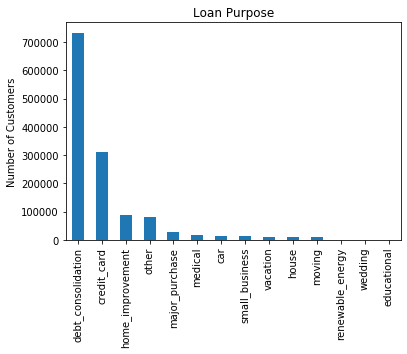

In [53]:
data['purpose'].value_counts().plot.bar()
plt.title('Loan Purpose')
plt.ylabel('Number of Customers')


The majority of the borrowers intend to use the loan for 'debt consolidation' or to repay their 'credit cards'. This is quite a common among borrowers. What the borrowers intend to do is, to consolidate all the debt that they have on different financial items, in one single debt, the new loan that they will take from Lending Club in this case. This loan will usually provide an advantage to the borrower, either in the form of lower interest rates than a credit card, for example, or longer repayment period.

In [54]:
# let's look at one additional categorical variable,
# "loan status", which represents the current status
# of the loan. This is whether the loan is still active
# and being repaid, or if it was defaulted,
# or if it was fully paid among other things.

data.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default'], dtype=object)

Text(0, 0.5, 'Number of customers')

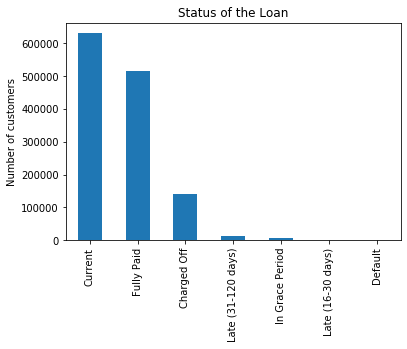

In [55]:
data['loan_status'].value_counts().plot.bar()
plt.title('Status of the Loan')
plt.ylabel('Number of customers')

We can see that the majority of the loans are active (current) and a big number have been 'Fully paid'. The remaining labels have the following meaning:

- Late (16-30 days): customer missed a payment
- Late (31-120 days): customer is behind in payments for more than a month
- Charged off: the company declared that they will not be able to recover the money for that loan ( money is typically lost)
- Issued: loan was granted but money not yet sent to borrower
- In Grace Period: window of time agreed with customer to wait for payment, usually, when customer is behind in their payments

In [61]:
# finally, let's look at a variable that is numerical,
# but its numbers have no real meaning, and therefore
# should be better considered as a categorical one.

data['id'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: id, dtype: float64

In [62]:
data.shape

(2260668, 145)

In [63]:
len(data['id'].unique())

1

## Dates and Times
A special type of categorical variable are those that instead of taking traditional labels, like color (blue, red), or city (London, Manchester), take dates as values. 

For example, date of birth ('29-08-1987', '12-01-2012'), or time of application ('2016-Dec', '2013-March').

Datetime variables can contain dates only, or time only, or date and time.

Typically, we would never work with a date variable as a categorical variable, for a variety of reasons:

- Date variables usually contain a huge number of individual categories, which will expand the feature space dramatically
- Date variables allow us to capture much more information from the dataset if preprocessed in the right way

- In addition, often, date variables will contain dates that were not present in the dataset that we used to train the machine learning algorithm. In fact, will contain dates placed in the future respect to the dates present in the dataset we used to train. Therefore, the machine learning model will not know what to do with them, because it never saw them while being trained.

In [67]:
use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']
df_pymnt = data[use_cols]
df_pymnt.head()

,loan_amnt,grade,purpose,issue_d,last_pymnt_d
0,2500,C,debt_consolidation,Dec-2018,Feb-2019
1,30000,D,debt_consolidation,Dec-2018,Feb-2019
2,5000,D,debt_consolidation,Dec-2018,Feb-2019
3,4000,D,debt_consolidation,Dec-2018,Feb-2019
4,30000,C,debt_consolidation,Dec-2018,Feb-2019


In [68]:

# let's inspect at the pandas type of object used to store the information

df_pymnt.dtypes

loan_amnt        int64
grade           object
purpose         object
issue_d         object
last_pymnt_d    object
dtype: object

In [79]:
# now let's parse the dates, currently coded as strings, into datetime format
# this will allow us to make some analysis afterwards

df_pymnt['issue_dt'] = pd.to_datetime(df_pymnt.issue_d)
df_pymnt['last_pymnt_dt'] = pd.to_datetime(df_pymnt.last_pymnt_d)

df_pymnt[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2018,2018-12-01,Feb-2019,2019-02-01
1,Dec-2018,2018-12-01,Feb-2019,2019-02-01
2,Dec-2018,2018-12-01,Feb-2019,2019-02-01
3,Dec-2018,2018-12-01,Feb-2019,2019-02-01
4,Dec-2018,2018-12-01,Feb-2019,2019-02-01


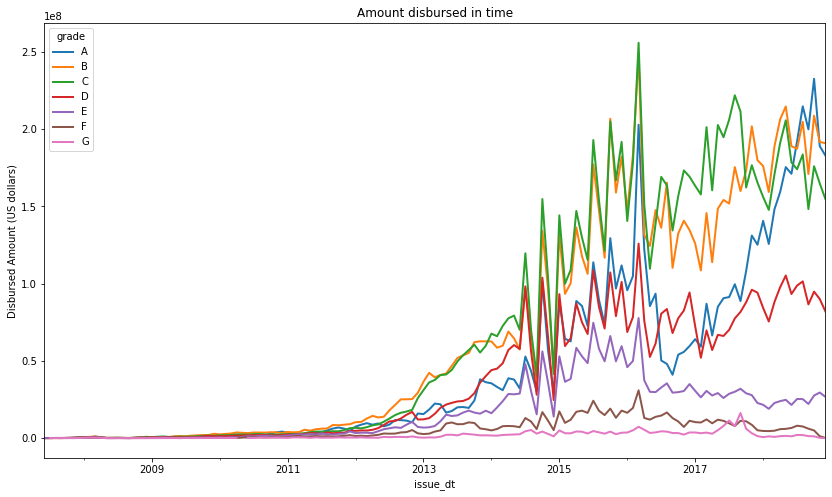

In [80]:
# let's see how much money Lending Club has disbursed
# (i.e., lent) over the years to the different risk
# markets (grade variable)
df_grp = df_pymnt.groupby(['issue_dt','grade'])['loan_amnt'].sum().unstack()
df_grp.plot(figsize=(14,8),linewidth=2)
plt.title('Amount disbursed in time')
plt.ylabel('Disbursed Amount (US dollars)')
plt.show()

#### Note

Lending Club seems to have increased the amount of money lent from 2013 onwards. The tendency indicates that they continue to grow. In addition, we can see that their major business comes from lending money to C and B grades.

'A' grades are the lower risk borrowers, this is borrowers that most likely will be able to repay their loans, as they are typically in a better financial situation. Borrowers within this grade are typically charged lower interest rates.

E, F and G grades represent the riskier borrowers. Usually borrowers in somewhat tighter financial situations, or for whom there is not sufficient financial history to make a reliable credit assessment. They are typically charged higher rates, as the business, and therefore the investors, take a higher risk when lending them money.

Lending Club lends the biggest fraction to borrowers that intend to use that money to repay other debt or credit cards.

In [81]:
df_grp.head(10)

grade,A,B,C,D,E,F,G
issue_dt,,,,,,,
2007-06-01,25600.0,23625.0,32850.0,1275.0,8500.0,NaN,NaN
2007-07-01,72750.0,36600.0,105350.0,49375.0,35850.0,36700.0,11700.0
2007-08-01,76850.0,60550.0,51725.0,63900.0,70500.0,118800.0,72975.0
2007-09-01,34500.0,64725.0,62875.0,31550.0,36400.0,76450.0,66450.0
2007-10-01,47700.0,53275.0,170525.0,124575.0,142350.0,117725.0,97075.0
2007-11-01,66950.0,229900.0,206675.0,140400.0,211000.0,120625.0,33100.0
2007-12-01,66850.0,348425.0,536875.0,381475.0,309225.0,145950.0,98375.0
2008-01-01,284525.0,647500.0,652000.0,495375.0,396200.0,314300.0,136100.0
2008-02-01,189500.0,801250.0,544500.0,547625.0,381625.0,184425.0,310300.0


In [83]:
data['open_il_24m'].unique()

array([ 2.,  3.,  5.,  1.,  0.,  4.,  6.,  7.,  9., 12.,  8., 10., 11.,
       19., 15., 14., 13., 17., 16., 18., 20., 26., 22., 21., 23., 39.,
       31., 24., 28., 51., 30., nan])

## Mixed variables
Mixed variables are those which values contain both numbers and labels.

Variables can be mixed for a variety of reasons. For example, when credit agencies gather and store financial information of users, usually, the values of the variables they store are numbers. However, in some cases the credit agencies cannot retrieve information for a certain user for different reasons. What Credit Agencies do in these situations is to code each different reason due to which they failed to retrieve information with a different code or 'label'. Like this, they generate mixed type variables. These variables contain numbers when the value could be retrieved, or labels otherwise.

As an example, think of the variable 'number_of_open_accounts'. It can take any number, representing the number of different financial accounts of the borrower. Sometimes, information may not be available for a certain borrower, for a variety of reasons. 

Each reason will be coded by a different letter, for example: 

* 'A': couldn't identify the person, 
* 'B': no relevant data, 
* 'C': person seems not to have any open account.

Another example of mixed type variables, is for example the variable missed_payment_status. This variable indicates, whether a borrower has missed a (any) payment in their financial item. 

For example, if the borrower has a credit card, this variable indicates whether they missed a monthly payment on it. Therefore, this variable can take values of 0, 1, 2, 3 meaning that the customer has missed 0-3 payments in their account. And it can also take the value D, if the customer defaulted on that account.

Typically, once the customer has missed 3 payments, the lender declares the item **defaulted (D)**, that is why this variable takes numerical values 0-3 and then D.